In [34]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from galpy.potential import MWPotential2014
from galpy.orbit import Orbit

harrisP1 = pd.read_csv("data/HarrisPartI.csv")
harrisP3 = pd.read_csv("data/HarrisPartIII.csv")
Krause = pd.read_csv("data/Krause21.csv")
VandenBerg = pd.read_csv("data/vandenBerg_table2.csv")

def norm_ids(series):
    return series.dropna().astype(str).str.replace(r"\s+","",regex=True).str.upper()

kraus_ids=set(norm_ids(Krause["Object"]))
#VandenBerg_ids=set('NGC'+norm_ids(VandenBerg["#NGC"]))

VandenBerg.iloc[:,0] = "NGC" + VandenBerg.iloc[:,0].astype(str)
#print(VandenBerg.iloc[:,0] )
#print(Krause.iloc[:,1] )

#union_ids = kraus_ids | VandenBerg_ids
#uncommon_ids = kraus_ids ^ VandenBerg_ids
#print (len(union_ids))
#print(union_ids)

list_accreted = ['Arp2' ,'NGC5024' ,'Crater' ,'IC4499', 'Pal4' ,'NGC5694' ,'NGC2298', 'NGC4147',
 'Pal14' ,'NGC7089' ,'NGC5272', 'NGC6934', 'NGC6101', 'NGC5466', 'Pal5' ,'Pal15',
 'Pal13' ,'NGC5053', 'NGC6715', 'Pal2', 'NGC1261', 'Whiting1' ,'NGC5634',
 'NGC7492', 'Terzan7', 'NGC5904' ,'IC1257', 'NGC2419' ,'NGC7006' ,'NGC6584',
 'NGC3201' ,'NGC6229' ,'Pyxis', 'NGC1904', 'NGC1851', 'NGCTer8', 'NGC6981' ,'E1',
 'NGC6864', 'Eridanus' ,'AM4', 'FSR1758']
set_accreted = set(list_accreted)

#int_accreted = set_accreted & union_ids
#print(uncommon_ids&int_accreted)
#print(set_accreted)
#print(union_ids)
#print(int_accreted)
#print(len(int_accreted))

Krause_filtered = Krause[Krause["Object"].isin(set_accreted)]
VandenBerg_filtered = VandenBerg[VandenBerg["#NGC"].isin(set_accreted)]
#print(VandenBerg)

VandenBerg_filtered= VandenBerg_filtered.rename(columns={"#NGC":"ID"})
#print(VandenBerg_filtered)

union_GCs= pd.concat([Krause_filtered, VandenBerg_filtered], ignore_index=True)
#print(len(VandenBerg_filtered))
#print(len(Krause_filtered))

Accreted = pd.merge(Krause_filtered, VandenBerg_filtered, left_on="Object", right_on="ID", how="outer",  suffixes=("_K", "_V"))
Union = pd.merge(Krause, VandenBerg, left_on="Object", right_on="#NGC", how="outer",  suffixes=("_K", "_V"))

Accreted["Age"] = Accreted["Age_V"].combine_first(Accreted["Age_K"])
Accreted["FeH"] = Accreted["FeH_V"].combine_first(Accreted["FeH_K"])
Accreted["ID"] = Accreted["Object"].combine_first(Accreted["ID"])
Accreted["ID"] = Accreted["ID"].combine_first(Accreted["Object"])
Union["Age"] = Union["Age_V"].combine_first(Union["Age_K"])
Union["FeH"] = Union["FeH_V"].combine_first(Union["FeH_K"])
Union["ID"] = Union["Object"].combine_first(Union["#NGC"])
Union["ID"] = Union["#NGC"].combine_first(Union["Object"])

Accreted = Accreted.drop(columns=["Age_K", "Age_V", "FeH_K", "FeH_V","Object","AltName","Object","Name"])
Union = Union.drop(columns=["Age_K", "Age_V", "FeH_K", "FeH_V","AltName","Object","#NGC","Name"])

InSitu = Union[~Union["ID"].isin(Accreted["ID"])].copy()
InSitu.reset_index(drop=True, inplace=True)

#print(InSitu)
#print(Union)
#Union.keys()

#print(Accreted)
#Accreted.keys()

#print((Accreted['Age_x'] - Accreted['Age_y'])/Accreted['Age_x']*100)
#print((Accreted['FeH_x'] - Accreted['FeH_y'])/Accreted['FeH_x']*100)



Accreted equation of fit
         2
-0.8865 x - 4.519 x + 6.863
In-Situ equation of fit
          2
-0.09995 x - 1.302 x + 10.39


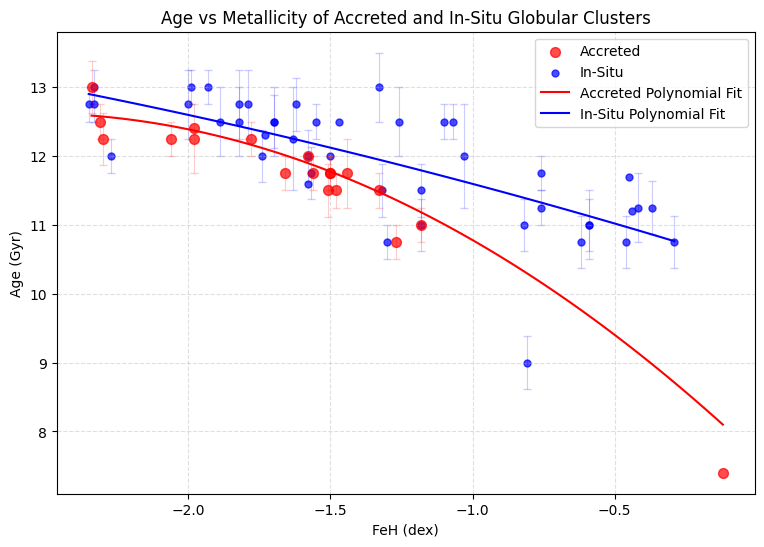

In [36]:

#mask = Accreted['ID'].isin(set_accreted)

fig, ax = plt.subplots(figsize=(9,6))
ax.scatter(Accreted['FeH'], Accreted['Age'], color='red', s=50 ,label='Accreted', zorder=2  , alpha=0.7)
ax.errorbar(Accreted['FeH'], Accreted['Age'], yerr=Accreted['Age_err'], fmt='none', ecolor='red', capsize=3, zorder=2, linewidth=0.8, alpha=0.2)
ax.scatter(InSitu['FeH'], InSitu['Age'], color='blue',s=25 ,label='In-Situ', zorder=1, alpha=0.7)
ax.errorbar(InSitu['FeH'], InSitu['Age'], yerr=InSitu['Age_err'], fmt='none', ecolor='blue', capsize=3, zorder=1, linewidth=0.8, alpha=0.2)
#ax.scatter(Accreted['FeH'], Accreted['Age'], yerr=Accreted['Age_err'], color='red', label='Accreted',zorder=2)
#ax.scatter(InSitu['FeH'], InSitu['Age'],yerr=Accreted["Age_err"], color='blue', label='In-Situ',zorder=1)


ax.grid(True, ls='--', alpha=0.4)

coeffs = np.polyfit(Accreted['FeH'], Accreted['Age'], deg=2)
poly_func1 = np.poly1d(coeffs)
x_smooth1 = np.linspace(Accreted['FeH'].min(), Accreted['FeH'].max(), 100)
y_smooth1 = poly_func1(x_smooth)
plt.plot(x_smooth1, y_smooth1, color='red', label='Accreted Polynomial Fit')

print("Accreted equation of fit")
print(poly_func1)


coeffs = np.polyfit(InSitu['FeH'], InSitu['Age'], deg=2)
poly_func = np.poly1d(coeffs)
x_smooth = np.linspace(InSitu['FeH'].min(), InSitu['FeH'].max(), 100)
y_smooth = poly_func(x_smooth)
plt.plot(x_smooth, y_smooth, color='blue', label='In-Situ Polynomial Fit')

print("In-Situ equation of fit")
print(poly_func)


# Add labels and legend
ax.set_xlabel('FeH (dex)')
ax.set_ylabel('Age (Gyr)')
ax.legend()
ax.set_title('Age vs Metallicity of Accreted and In-Situ Globular Clusters')

plt.show()





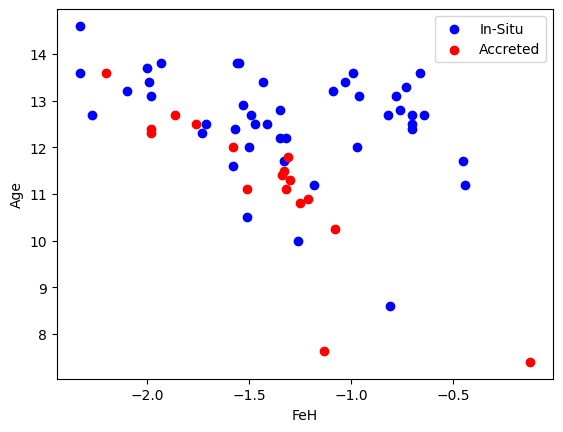

In [4]:
# Create a mask for IDs in int_accreted
mask = Krause['Object'].isin(set_accreted)

# Create the figure and axis
fig, ax = plt.subplots()

# Plot in situ stars (blue)
ax.scatter(Krause.loc[~mask, 'FeH'], Krause.loc[~mask, 'Age'], color='blue', label='In-Situ')

# Plot accreted stars (red)
ax.scatter(Krause.loc[mask, 'FeH'], Krause.loc[mask, 'Age'], color='red', label='Accreted')

# Add labels and legend
ax.set_xlabel('FeH')
ax.set_ylabel('Age')
ax.legend()

plt.show()


#Krause.plot(kind = 'scatter', x ='FeH',y='Age')

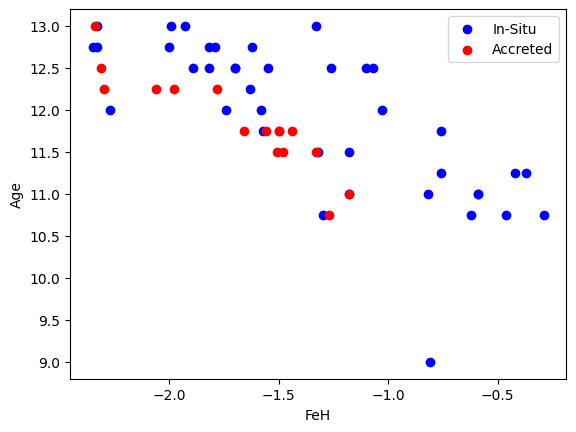

In [5]:
# Create a mask for IDs in int_accreted
mask = VandenBerg['#NGC'].isin(set_accreted)

# Create the figure and axis
fig, ax = plt.subplots()

# Plot non-accreted stars (blue)
ax.scatter(VandenBerg.loc[~mask,'FeH'], VandenBerg.loc[~mask, 'Age'],color='blue', label='In-Situ')

# Plot accreted stars (red)
ax.scatter(VandenBerg.loc[mask, 'FeH'], VandenBerg.loc[mask, 'Age'], color='red', label='Accreted')

# Add labels and legend
ax.set_xlabel('FeH')
ax.set_ylabel('Age')
ax.legend()


#VandenBerg.plot(kind = 'scatter', x ='FeH',y='Age')

In [ ]:
orbits_galpy = Orbit.from_name('MW Globular Clusters')
Lz = []
E = []
names = []
apo = []
zmax = []
ecc = []
circ = []

ts = np.linspace(0, 100, 1000)



for orb in orbits_galpy:
    orb.integrate(ts, MWPotential2014)
    
    names.append(orb.name)
    Lz.append(orb.Lz(pot=MWPotential2014))
    E.append(orb.E(pot=MWPotential2014))
    apo.append(orb.rap(pot=MWPotential2014))
    zmax.append(orb.zmax(pot=MWPotential2014))  
    ecc.append(orb.e(pot=MWPotential2014))

    #estimation of circularity

print(names)

AttributeError: Integrate the orbit first or use analytic=True for approximate eccentricity